<a href="https://colab.research.google.com/github/JCaballerot/Credit-Scoring/blob/main/CreditScoring/shap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 80 kB 6.3 MB/s 


In [ ]:
import pandas as pd
import statsmodels.api as sm
from category_encoders import TargetEncoder



In [ ]:
pddf = pd.read_csv('Train_Dataset.csv')

In [ ]:
pddf.replace(['x', '#','@','$','&','#VALUE!'], 0, inplace = True)
pddf.fillna(0, inplace = True)

In [ ]:
# Indentificar las variables 

features = list(set(pddf.columns.tolist()) - set(['ID','Default']))

In [ ]:
# Determinando matrices de datos

X = pddf[features]
y = pddf.Default

X['intercept'] = 1  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y,                                                    
                                                    test_size = 0.3,
                                                    random_state = 123)
                                                    

In [ ]:
# Identificar variables por tipo

str_features = pddf.select_dtypes(include=['object']).drop(columns = ['Client_Income', 'Credit_Amount', 'Loan_Annuity', 'Population_Region_Relative', 'Age_Days', 'Employed_Days', 'Registration_Days', 'ID_Days', 'Score_Source_3']).columns.tolist()
num_features = list(set(pddf.columns.tolist()) - set(str_features + ['ID', 'Default']))


In [ ]:
X_train_2 = X_train.copy()[num_features]
X_test_2 = X_test.copy()[num_features]

In [ ]:
 # Target Encoding

encoder = TargetEncoder()
encoder = encoder.fit(X_train[str_features], y_train)

X_train_2[[x + '_num' for x in str_features]] = encoder.transform(X_train[str_features])
X_test_2[[x + '_num' for x in str_features]] = encoder.transform(X_test[str_features])


In [ ]:
features = num_features + [x + '_num' for x in str_features]

In [ ]:
X_train_2 = X_train_2.astype('float64')

In [ ]:

logit = sm.Logit(y_train, X_train_2) 
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.258986
         Iterations 10


In [ ]:

from sklearn import linear_model
logmodel = linear_model.LogisticRegression().fit(X_train_2, y_train) 



In [ ]:
predictions = logmodel.predict(X_train_2)  

In [ ]:
!pip3 install shap
import shap


In [ ]:
X_train_2.columns.tolist()

In [ ]:
explainer = shap.Explainer(logmodel, 
                           X_train_2,
                           feature_names=X_train_2.columns.tolist()) 

shap_values = explainer(X_train_2)   


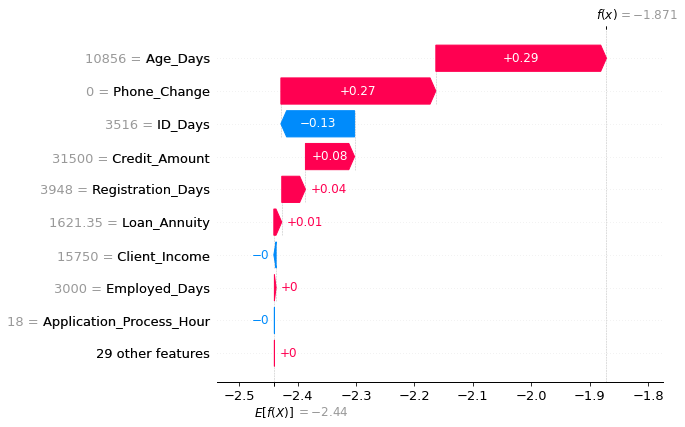

In [ ]:
shap.plots.waterfall(shap_values[100])


In [ ]:
# visualize the first prediction's explanation with a force plot
shap.initjs()
shap.plots.force(shap_values[0])

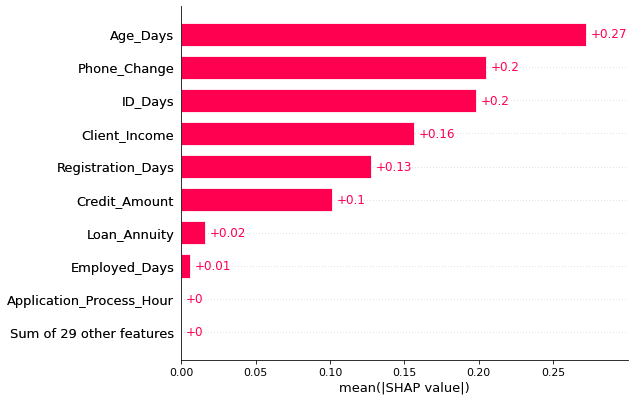

In [ ]:
shap.plots.bar(shap_values)  

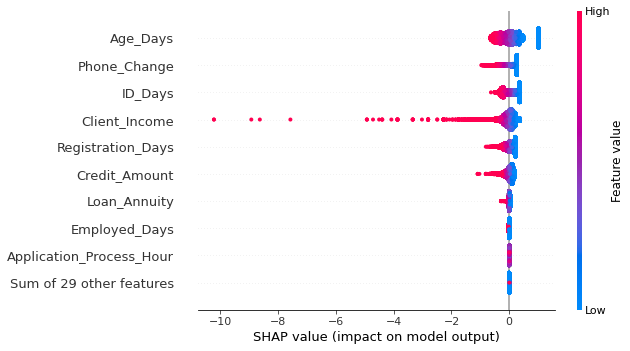

In [ ]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

In [ ]:
shap.dependence_plot('Age_Days', shap_values, X_train_2)


In [ ]:
shap.dependence_plot('Age_Days', shap_values, X_train_2.Age_Days)


TypeError: ignored

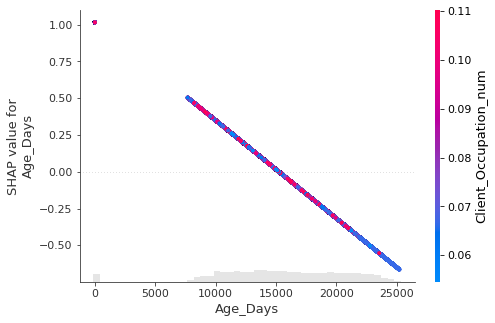

In [ ]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:,"Age_Days"], color = shap_values)